In [1]:
import requests 
import pandas as pd
import numpy 
import seaborn as sns
import matplotlib.pyplot as plt
print("done")

done


In [2]:
# Where is the majoirty of crime occuring?
# What is the most frequent category of offence? 
# 
# Is there a relationship between the type of crime and time of year?
# Does weather affect type of crime? 

params = {
    'lat': 50.805832,  # Latitude of Portsmouth
    'lng': -1.087222,   # Longitude of Portsmouth  
    
}

response = requests.get("https://data.police.uk/api/crimes-street/all-crime", params=params)
print(response)

<Response [200]>


In [3]:
crime_json = response.json()
df = pd.DataFrame(crime_json)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
df.drop(labels=['context', 'persistent_id', 'location_subtype'], axis=1, inplace=True)
df.head()

,category,location_type,location,outcome_status,id,month
0,anti-social-behaviour,Force,"{'latitude': '50.801747', 'street': {'id': 1554542, 'name': 'On or near Jacob's Street'}, 'longitude': '-1.087243'}",None,117597222,2024-03
1,anti-social-behaviour,Force,"{'latitude': '50.799372', 'street': {'id': 1554299, 'name': 'On or near Willis Road'}, 'longitude': '-1.091660'}",None,117597514,2024-03
2,anti-social-behaviour,Force,"{'latitude': '50.799159', 'street': {'id': 1553681, 'name': 'On or near Old Star Place'}, 'longitude': '-1.105968'}",None,117597555,2024-03
3,anti-social-behaviour,Force,"{'latitude': '50.799193', 'street': {'id': 1554345, 'name': 'On or near Surrey Street'}, 'longitude': '-1.090585'}",None,117597554,2024-03
4,anti-social-behaviour,Force,"{'latitude': '50.806115', 'street': {'id': 1555024, 'name': 'On or near Westminster Place'}, 'longitude': '-1.079991'}",None,117597039,2024-03


In [4]:
for row in df:
    print(f"{row}: " + str(df[row].isnull().sum()))

category: 0
location_type: 0
location: 0
outcome_status: 78
id: 0
month: 0


In [5]:
df['id'].duplicated().sum()

0

In [6]:
df['month'].value_counts()

2024-03    938
Name: month, dtype: int64

In [7]:
df.dtypes
df['month'] = pd.to_datetime(df['month'])
df.dtypes

category                  object
location_type             object
location                  object
outcome_status            object
id                         int64
month             datetime64[ns]
dtype: object

In [9]:
outcome_status = []
for row in df['outcome_status']:
    if row is not None:
        outcome_status.append(row['category'])
    else:
        outcome_status.append('None')

df['outcome_status'] = outcome_status
df.sample(10)

,category,location_type,location,outcome_status,id,month
659,violent-crime,Force,"{'latitude': '50.803825', 'street': {'id': 1555514, 'name': 'On or near Fourth Street'}, 'longitude': '-1.071351'}",Under investigation,117597120,2024-03-01
190,drugs,BTP,"{'latitude': '50.796517', 'street': {'id': 2343655, 'name': 'Fratton (station)'}, 'longitude': '-1.073766'}",Under investigation,117780837,2024-03-01
111,criminal-damage-arson,Force,"{'latitude': '50.801432', 'street': {'id': 1554841, 'name': 'On or near Fyning Street'}, 'longitude': '-1.082567'}",Under investigation,117597324,2024-03-01
368,shoplifting,Force,"{'latitude': '50.798024', 'street': {'id': 1554314, 'name': 'On or near Parking Area'}, 'longitude': '-1.090693'}",Under investigation,117597617,2024-03-01
87,bicycle-theft,Force,"{'latitude': '50.800385', 'street': {'id': 1554273, 'name': 'On or near Kingswell Street'}, 'longitude': '-1.091286'}",Investigation complete; no suspect identified,117597452,2024-03-01
936,other-crime,Force,"{'latitude': '50.796322', 'street': {'id': 1554352, 'name': 'On or near The Mary Rose Street'}, 'longitude': '-1.090400'}",Under investigation,117689680,2024-03-01
161,criminal-damage-arson,Force,"{'latitude': '50.794721', 'street': {'id': 1554662, 'name': 'On or near River's Street'}, 'longitude': '-1.085763'}",Investigation complete; no suspect identified,117597991,2024-03-01
594,violent-crime,Force,"{'latitude': '50.795738', 'street': {'id': 1554675, 'name': 'On or near Quinton Close'}, 'longitude': '-1.084679'}",Under investigation,117597869,2024-03-01
891,violent-crime,Force,"{'latitude': '50.799855', 'street': {'id': 1555415, 'name': 'On or near Liverpool Road'}, 'longitude': '-1.071927'}",Action to be taken by another organisation,117597423,2024-03-01
557,violent-crime,Force,"{'latitude': '50.801886', 'street': {'id': 1555549, 'name': 'On or near Cuthbert Road'}, 'longitude': '-1.070666'}",Under investigation,117597261,2024-03-01


In [10]:
location = []
for row in df['location']:
    crime_loc = row['street']['name']
    crime_loc = crime_loc.replace('On or near', '')
    location.append(crime_loc)

df['location'] = location
df.sample(10)

,category,location_type,location,outcome_status,id,month
370,shoplifting,Force,Willis Road,Under investigation,117597542,2024-03-01
173,drugs,Force,Aylward Street,Local resolution,117597591,2024-03-01
825,violent-crime,Force,Weymouth Road,Under investigation,117596474,2024-03-01
165,criminal-damage-arson,Force,Worcester Close,Under investigation,117598110,2024-03-01
574,violent-crime,Force,Parking Area,Unable to prosecute suspect,117597654,2024-03-01
355,robbery,Force,Petrol Station,Under investigation,117597865,2024-03-01
60,anti-social-behaviour,Force,Nightclub,None,117597467,2024-03-01
517,vehicle-crime,Force,Further/higher Educational Building,Under investigation,117597894,2024-03-01
833,violent-crime,Force,Nightclub,Under investigation,117596719,2024-03-01
239,other-theft,Force,Cottage Grove,Investigation complete; no suspect identified,117598212,2024-03-01


([0, 1, 2, 3, 4],
 [Text(0, 0, 'violent-crime'),
  Text(1, 0, 'shoplifting'),
  Text(2, 0, 'public-order'),
  Text(3, 0, 'anti-social-behaviour'),
  Text(4, 0, 'criminal-damage-arson')])

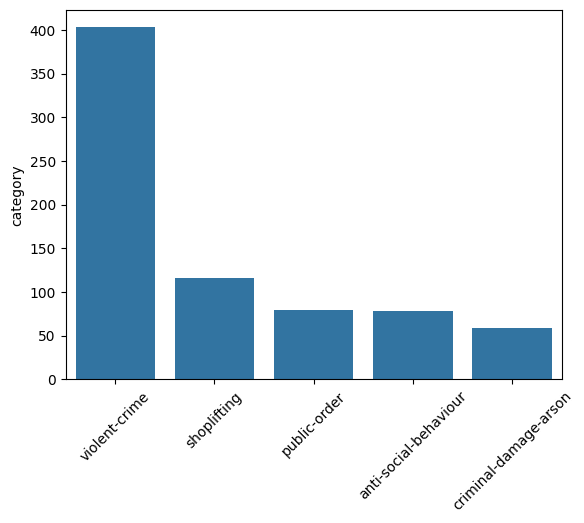

In [161]:
top_5_crime = df['category'].value_counts()[:5]
sns.barplot(top_5_crime)
plt.xticks(rotation=45)

([0, 1, 2, 3, 4],
 [Text(0, 0, ' Parking Area'),
  Text(1, 0, ' Supermarket'),
  Text(2, 0, ' Guildhall Walk'),
  Text(3, 0, " Jacob's Street"),
  Text(4, 0, ' Shopping Area')])

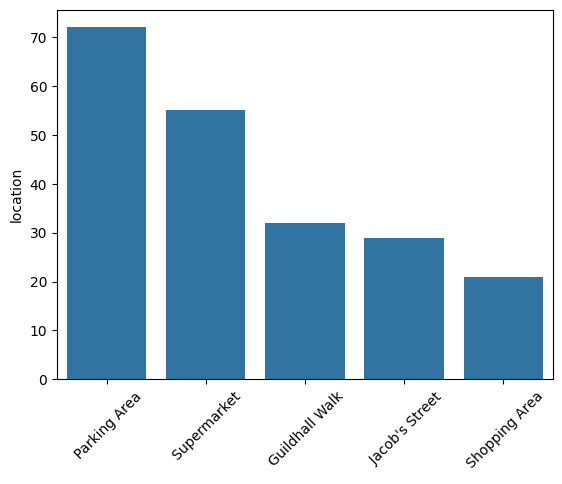

In [11]:
top_5_loc = df['location'].value_counts()[:5]
sns.barplot(top_5_loc)
plt.xticks(rotation=45)

([0, 1], [Text(0, 0, 'Force'), Text(1, 0, 'BTP')])

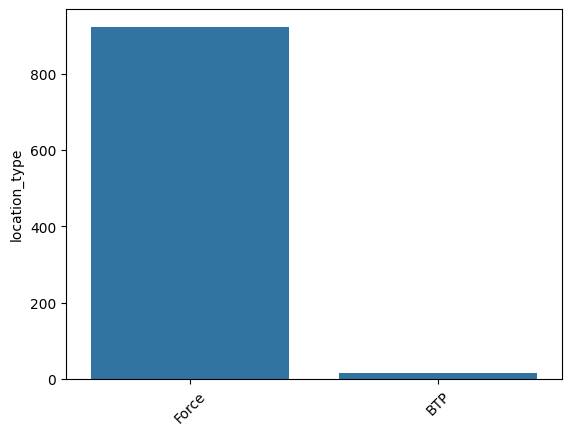

In [164]:
loc_type = df['location_type'].value_counts()
sns.barplot(loc_type)
plt.xticks(rotation=45)

([0, 1, 2, 3, 4],
 [Text(0, 0, 'Under investigation'),
  Text(1, 0, 'Investigation complete; no suspect identified'),
  Text(2, 0, 'Unable to prosecute suspect'),
  Text(3, 0, 'None'),
  Text(4, 0, 'Awaiting court outcome')])

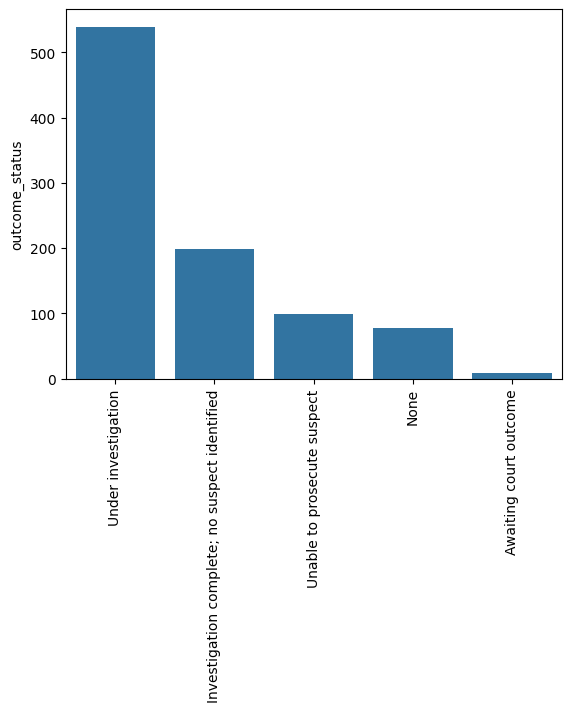

In [168]:
status = df['outcome_status'].value_counts()[:5]
sns.barplot(status)
plt.xticks(rotation=90)

In [12]:
df.shape

(938, 6)

In [13]:
df.to_csv("Crimes_Port_2024_03", index=False)